In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pickle

In [4]:
from sklearn.datasets import fetch_covtype
import pandas as pd

# dataset load karo
data = fetch_covtype()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
X = df.drop('target', axis=1)
y = df['target']

In [12]:
# Train-test split (original imbalanced dataset)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [13]:
# Random Forest on imbalanced data
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)


In [15]:
from sklearn.metrics import classification_report
from collections import Counter
print("📌 Performance on Imbalanced Data")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Class distribution (train):", Counter(y_train))

📌 Performance on Imbalanced Data
Accuracy: 0.9533316695782381
              precision    recall  f1-score   support

           1       0.96      0.94      0.95     42368
           2       0.95      0.97      0.96     56661
           3       0.94      0.96      0.95      7151
           4       0.92      0.86      0.89       549
           5       0.95      0.77      0.85      1899
           6       0.93      0.89      0.91      3473
           7       0.97      0.95      0.96      4102

    accuracy                           0.95    116203
   macro avg       0.95      0.91      0.92    116203
weighted avg       0.95      0.95      0.95    116203

Class distribution (train): Counter({2: 226640, 1: 169472, 3: 28603, 7: 16408, 6: 13894, 5: 7594, 4: 2198})


C:\Users\Mani\AppData\Local\Temp\ipykernel_10348\4245771560.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Class', y='count', data=count_df, palette='viridis')


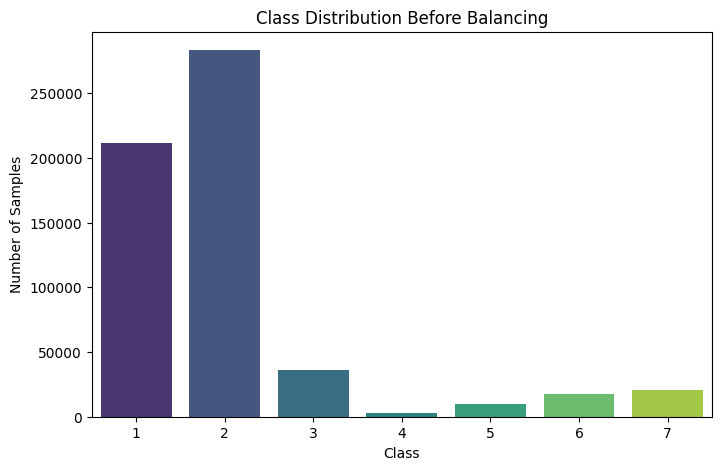

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# har class ka count
class_counts = Counter(y)

# dataframe bana lo plotting ke liye
count_df = pd.DataFrame.from_dict(class_counts, orient='index', columns=['count'])
count_df.index.name = 'Class'
count_df.reset_index(inplace=True)

# plot
plt.figure(figsize=(8,5))
sns.barplot(x='Class', y='count', data=count_df, palette='viridis')

plt.title("Class Distribution Before Balancing")
plt.xlabel("Class")
plt.ylabel("Number of Samples")
plt.show()


In [17]:

# pandas value_counts 
print(y.value_counts())


target
2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: count, dtype: int64


In [18]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

print("Before undersampling:", Counter(y))

# undersampling
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

print("After undersampling:", Counter(y_resampled))


Before undersampling: Counter({2: 283301, 1: 211840, 3: 35754, 7: 20510, 6: 17367, 5: 9493, 4: 2747})


c:\Users\Mani\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
c:\Users\Mani\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


After undersampling: Counter({1: 2747, 2: 2747, 3: 2747, 4: 2747, 5: 2747, 6: 2747, 7: 2747})


In [19]:
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

print("Before balancing:")
print("X shape:", X.shape)
print("y shape:", y.shape)
print("Class distribution:", Counter(y))


Before balancing:
X shape: (581012, 54)
y shape: (581012,)
Class distribution: Counter({2: 283301, 1: 211840, 3: 35754, 7: 20510, 6: 17367, 5: 9493, 4: 2747})


In [20]:
# Apply undersampling
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

print("\nAfter balancing:")
print("X_resampled shape:", X_resampled.shape)
print("y_resampled shape:", y_resampled.shape)

c:\Users\Mani\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
c:\Users\Mani\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(



After balancing:
X_resampled shape: (19229, 54)
y_resampled shape: (19229,)


C:\Users\Mani\AppData\Local\Temp\ipykernel_10348\2416617634.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Class', y='count', data=before_df, palette='viridis', ax=axes[0])
C:\Users\Mani\AppData\Local\Temp\ipykernel_10348\2416617634.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Class', y='count', data=after_df, palette='viridis', ax=axes[1])


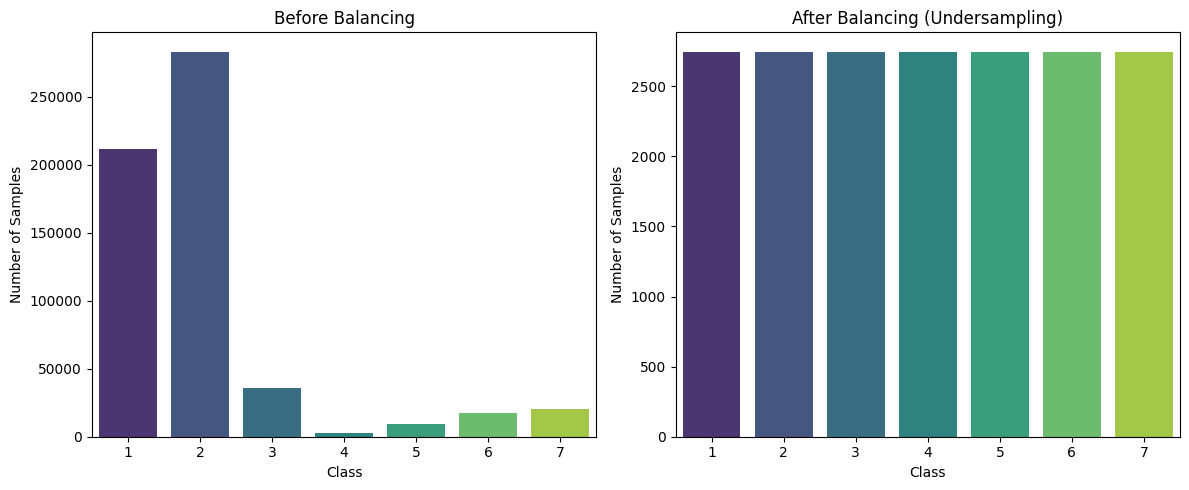

In [21]:
# Plot side by side
fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.barplot(x='Class', y='count', data=before_df, palette='viridis', ax=axes[0])
axes[0].set_title("Before Balancing")
axes[0].set_xlabel("Class")
axes[0].set_ylabel("Number of Samples")

sns.barplot(x='Class', y='count', data=after_df, palette='viridis', ax=axes[1])
axes[1].set_title("After Balancing (Undersampling)")
axes[1].set_xlabel("Class")
axes[1].set_ylabel("Number of Samples")

plt.tight_layout()
plt.show()

In [22]:
# Train-test split (balanced dataset)
X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42)

In [23]:
# Random Forest on balanced data
rf_res = RandomForestClassifier(random_state=42)
rf_res.fit(X_train_res, y_train_res)
y_pred_res = rf_res.predict(X_test_res)

In [24]:
print("\n📌 Performance on Balanced Data (Undersampling)")
print("Accuracy:", accuracy_score(y_test_res, y_pred_res))
print(classification_report(y_test_res, y_pred_res))
print("Class distribution (train):", Counter(y_train_res))


📌 Performance on Balanced Data (Undersampling)
Accuracy: 0.874154966198648
              precision    recall  f1-score   support

           1       0.81      0.79      0.80       543
           2       0.82      0.72      0.77       554
           3       0.87      0.82      0.84       569
           4       0.94      0.96      0.95       537
           5       0.91      0.95      0.93       550
           6       0.84      0.90      0.87       568
           7       0.93      0.97      0.95       525

    accuracy                           0.87      3846
   macro avg       0.87      0.88      0.87      3846
weighted avg       0.87      0.87      0.87      3846

Class distribution (train): Counter({7: 2222, 4: 2210, 1: 2204, 5: 2197, 2: 2193, 6: 2179, 3: 2178})


In [28]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning with GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 200],
    'max_depth': [None, 10, 20,30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

In [29]:
rf = RandomForestClassifier(random_state=42)

# GridSearch with 3-fold cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                            cv=3, n_jobs=-1, verbose=2, scoring='f1_macro')
grid_search.fit(X_train_res, y_train_res)

Fitting 3 folds for each of 432 candidates, totalling 1296 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 200]},
             scoring='f1_macro', verbose=2)

In [30]:
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# best model use karna
best_rf = grid_search.best_estimator_

# prediction
y_pred_res = best_rf.predict(X_test_res)


Best Parameters: {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Score: 0.8594599831843222


In [31]:
# Final model with best parameters
best_rf = RandomForestClassifier(
    bootstrap=False,
    max_depth=None,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=200,
    random_state=42
)

best_rf.fit(X_train_res, y_train_res)


RandomForestClassifier(bootstrap=False, n_estimators=200, random_state=42)

In [32]:

# Predict
y_pred_best = best_rf.predict(X_test_res)

# Evaluate
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

print("Accuracy:", accuracy_score(y_test_res, y_pred_best))
print("\nClassification Report:\n", classification_report(y_test_res, y_pred_best))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_res, y_pred_best))


Accuracy: 0.8801352054082163

Classification Report:
               precision    recall  f1-score   support

           1       0.81      0.78      0.80       543
           2       0.82      0.74      0.78       554
           3       0.88      0.84      0.86       569
           4       0.95      0.96      0.96       537
           5       0.92      0.96      0.94       550
           6       0.85      0.92      0.88       568
           7       0.92      0.96      0.94       525

    accuracy                           0.88      3846
   macro avg       0.88      0.88      0.88      3846
weighted avg       0.88      0.88      0.88      3846


Confusion Matrix:
 [[424  74   0   0   9   0  36]
 [ 80 411  12   0  32  13   6]
 [  0   1 477  22   5  64   0]
 [  0   0  10 518   0   9   0]
 [  0   9   7   0 529   4   1]
 [  0   4  38   4   2 520   0]
 [ 17   2   0   0   0   0 506]]


Default Model Accuracy: 0.9533316695782381

Classification Report (Default):
               precision    recall  f1-score   support

           1       0.96      0.94      0.95     42368
           2       0.95      0.97      0.96     56661
           3       0.94      0.96      0.95      7151
           4       0.92      0.86      0.89       549
           5       0.95      0.77      0.85      1899
           6       0.93      0.89      0.91      3473
           7       0.97      0.95      0.96      4102

    accuracy                           0.95    116203
   macro avg       0.95      0.91      0.92    116203
weighted avg       0.95      0.95      0.95    116203



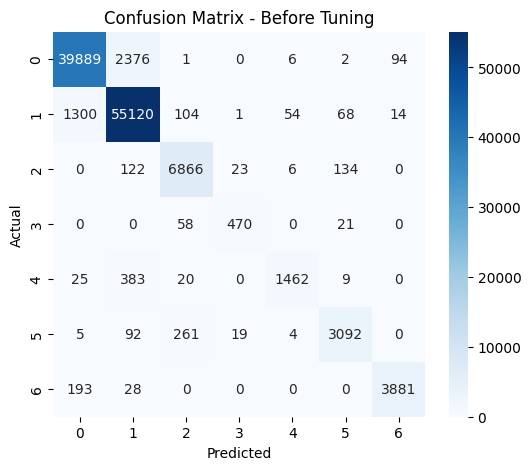

In [ ]:
# Before Tuning
# ------------------------
rf_default = RandomForestClassifier(random_state=42)
rf_default.fit(X_train, y_train)
y_pred_default = rf_default.predict(X_test)
print("Default Model Accuracy:", accuracy_score(y_test, y_pred_default))
print("\nClassification Report (Default):\n", classification_report(y_test, y_pred_default))

cm_default = confusion_matrix(y_test, y_pred_default)
plt.figure(figsize=(6,5))
sns.heatmap(cm_default, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Before Tuning")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ------------------------
# After Tuning
# ------------------------
rf_best = RandomForestClassifier(**grid_search.best_params_, random_state=42)
rf_best.fit(X_train, y_train)
y_pred_best = rf_best.predict(X_test)

print("Tuned Model Accuracy:", accuracy_score(y_test, y_pred_best))
print("\nClassification Report (Tuned):\n", classification_report(y_test, y_pred_best))

cm_best = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(6,5))
sns.heatmap(cm_best, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - After Tuning")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()